In [5]:
import platform
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
if platform.system() == "Darwin":           # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')



df = pd.read_csv("../해커톤/s_woo.csv", encoding='euc-kr')

X=df[['위안화원_시', '코스피시가', '달러위안화_시', 'WTI', '달러인덱스', '콜금리', '엔원_시']]
y=df['달러원종가']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import SGDRegressor

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Min-Max scaler
    ('sgd', SGDRegressor(shuffle=False))  # SGDRegressor model
])

pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)


mse= mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / np.array(y_test))) * 100
print('MSE: {0:3f}, RMSE: {1:3f}, R-squared: {2:3f}, MAE: {3:3f}, MAPE: {4:3f}%'.format(mse, rmse, r2, mae, mape))


MSE: 56.592868, RMSE: 7.522823, R-squared: 0.989991, MAE: 5.382861, MAPE: 0.459440%


In [10]:

result = pd.DataFrame(data={'Y':y_test, 'Y_pred(SGD)':y_pred,'diff(SGD)':np.round(np.abs(y_test-y_pred),2)})
result.sort_values(by=['diff(SGD)'], ascending=False)

,Y,Y_pred(SGD),diff(SGD)
102,1235.61,1192.828283,42.78
218,1164.50,1124.254178,40.25
93,1194.25,1158.399118,35.85
3093,1444.63,1416.948640,27.68
410,1107.15,1080.158776,26.99
...,...,...,...
932,1073.25,1073.206797,0.04
3160,1231.46,1231.429232,0.03
736,1057.99,1057.958516,0.03
1052,1025.05,1025.066098,0.02


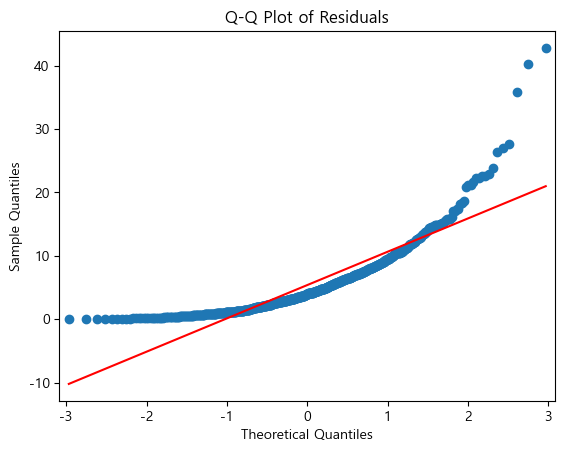

Normality test statistic: 369.82671519687966
p-value: 4.933432208071959e-81


In [11]:
from scipy.stats import normaltest
import statsmodels.api as sm
# Residuals
residuals = result['diff(SGD)']

# Residual analysis


# Q-Q Plot
sm.qqplot(residuals.values.flatten(), line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# 잔차의 정규성 검정
statistic, p_value = normaltest(residuals.values.flatten())

print("Normality test statistic:", statistic)
print("p-value:", p_value)

In [14]:
# from scipy.stats import jarque_bera
import numpy as np
from scipy.stats import jarque_bera


# Jarque-Bera 정규성 검정 수행
jb_value, p_value = jarque_bera(residuals)

# 검정 통계량과 p-value 출력 
print("Jarque-Bera 검정 통계량: {:.2f}".format(jb_value))
print("p-value: {:.8f}".format(p_value))

Jarque-Bera 검정 통계량: 3080.84
p-value: 0.00000000


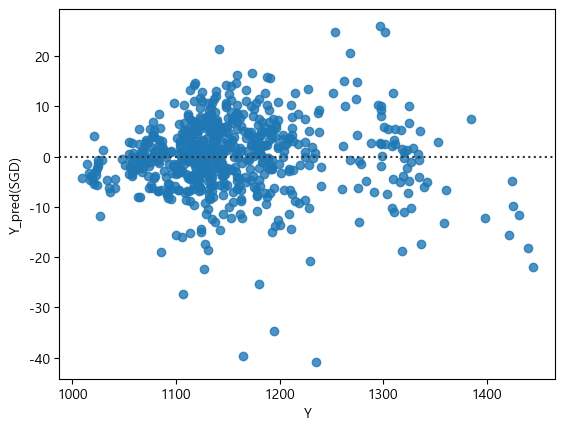

In [15]:
import seaborn as sns

sns.residplot(x=result['Y'],y= result['Y_pred(SGD)'])
plt.show()